In [1]:
import geopandas as gpd
from tqdm import tqdm
from shapely.validation import explain_validity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import calendar
from itertools import cycle

/opt/anaconda3/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [26]:
os.chdir("../../scripts")
from clustering_operations import *
from HierarchicalClustering import HierarchicalClustering

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
file = "../data/shapefiles/FAPAN_level_07/FAPAN_level_07_inclusive.shp"    

# open file
shp = gpd.read_file(file)
df = pd.read_csv("../data/FAPAN_level_07.csv")

In [4]:
df

,HYBAS_ID,SUBIDs,1,2,3,4,5,6,7,8,...,195,196,197,198,199,200,201,202,203,204
0,2070000010,9000340.0,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2070000020,"9713800.0,9714060.0,9713811.0,9000340.0,900034...",-1.322753,-0.781449,-1.047273,-1.703376,-1.276926,-1.180634,-1.538944,-1.531854,...,0.404243,0.260235,0.599397,1.216978,0.375715,-0.147517,-0.201637,-0.408996,0.149820,0.526136
2,2070000030,"9714184.0,9714057.0,9714060.0,9713809.0,971381...",-1.525035,-1.113620,-1.350137,-1.613114,-1.410301,-1.400624,-1.571780,-1.620268,...,1.460454,1.235448,0.879883,1.515541,1.158499,0.869266,0.876306,0.564344,1.104095,1.402583
3,2070000240,"9749824.0,9750124.0,9750135.0,9749914.0,974997...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2070816790,"9749893.0,9750135.0,9714184.0,9714057.0,974989...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,2070099470,"9715425.0,9621857.0,9714987.0,9715442.0,971557...",-1.222142,-0.711898,-0.088376,-1.146354,-0.838684,-0.836202,-0.209959,0.100777,...,1.198548,2.198667,2.341377,1.601097,1.100800,1.080092,1.160548,0.472319,0.367013,-0.033820
4058,2070099690,"9001540.0,9001541.0,9001542.0,9001543.0,977431...",0.119064,-0.136186,0.075601,-0.777327,-0.387475,0.855242,0.448400,-0.593276,...,-1.487927,-0.121175,0.295587,-2.047816,-1.136042,0.584246,1.187967,1.036153,0.237141,0.450584
4059,2070101800,"9705800.0,9705765.0,9705764.0,9705685.0",-0.510093,-0.410916,0.020650,-0.066599,-0.429246,0.713828,0.363515,0.253769,...,0.440076,0.602225,0.888801,-1.999916,-0.426395,-0.770768,-0.404979,-0.365298,-0.123865,-1.388836
4060,2070104700,"9001514.0,9505387.0,9001515.0,9001519.0,950584...",0.568573,0.396927,-0.961753,-0.707343,-0.173271,0.445322,0.454190,-0.393404,...,-1.008761,-0.679805,-0.816639,-1.451800,0.705150,0.560013,-0.352160,-1.562156,-0.273103,0.484693


In [5]:
shp['validity'] = shp.apply(lambda row: explain_validity(row.geometry), axis=1)
shp[shp['validity'] != 'Valid Geometry'].shape

(234, 16)

In [6]:
df = df.drop("SUBIDs", axis=1)
df = df.rename(columns={"HYBAS_ID" : "SUBID"})
shp = shp.rename(columns={"HYBAS_ID" : "SUBID"})
df

,SUBID,1,2,3,4,5,6,7,8,9,...,195,196,197,198,199,200,201,202,203,204
0,2070000010,-1.479092,-1.461161,-1.453289,-1.481299,-1.449651,-1.545862,-1.579616,-1.687005,-1.750921,...,1.655333,1.592781,0.853791,1.173939,1.140341,1.228164,1.138968,0.679221,1.044652,1.435165
1,2070000020,-1.322753,-0.781449,-1.047273,-1.703376,-1.276926,-1.180634,-1.538944,-1.531854,-1.246925,...,0.404243,0.260235,0.599397,1.216978,0.375715,-0.147517,-0.201637,-0.408996,0.149820,0.526136
2,2070000030,-1.525035,-1.113620,-1.350137,-1.613114,-1.410301,-1.400624,-1.571780,-1.620268,-1.442330,...,1.460454,1.235448,0.879883,1.515541,1.158499,0.869266,0.876306,0.564344,1.104095,1.402583
3,2070000240,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2070816790,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4057,2070099470,-1.222142,-0.711898,-0.088376,-1.146354,-0.838684,-0.836202,-0.209959,0.100777,0.268928,...,1.198548,2.198667,2.341377,1.601097,1.100800,1.080092,1.160548,0.472319,0.367013,-0.033820
4058,2070099690,0.119064,-0.136186,0.075601,-0.777327,-0.387475,0.855242,0.448400,-0.593276,-0.178350,...,-1.487927,-0.121175,0.295587,-2.047816,-1.136042,0.584246,1.187967,1.036153,0.237141,0.450584
4059,2070101800,-0.510093,-0.410916,0.020650,-0.066599,-0.429246,0.713828,0.363515,0.253769,0.206735,...,0.440076,0.602225,0.888801,-1.999916,-0.426395,-0.770768,-0.404979,-0.365298,-0.123865,-1.388836
4060,2070104700,0.568573,0.396927,-0.961753,-0.707343,-0.173271,0.445322,0.454190,-0.393404,0.600451,...,-1.008761,-0.679805,-0.816639,-1.451800,0.705150,0.560013,-0.352160,-1.562156,-0.273103,0.484693


<AxesSubplot:>

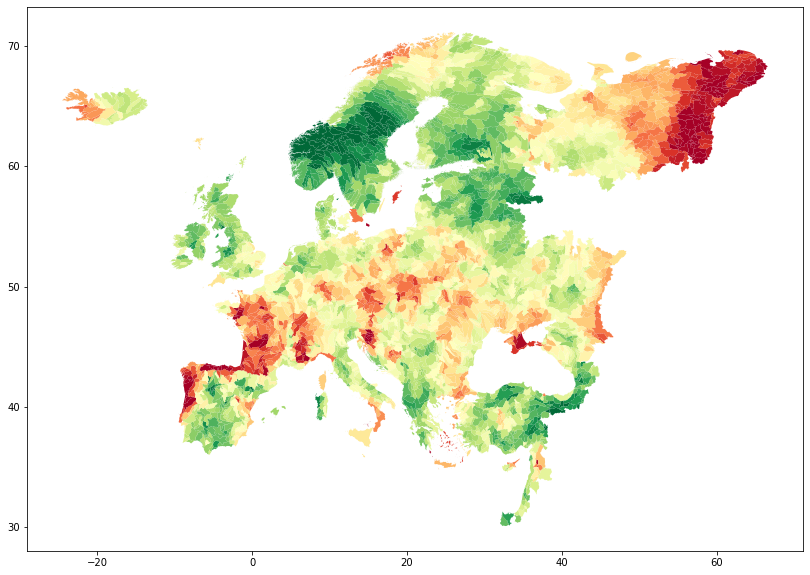

In [7]:
shp.plot(figsize=(16,10), column=df['198'], cmap='RdYlGn', vmin=-2, vmax=2)

In [8]:
# Calculate centroids
shp['centroid'] = shp['geometry'].centroid

# Extract latitude and longitude
shp['LATITUDE'] = shp['centroid'].apply(lambda centroid: centroid.y)
shp['LONGITUDE'] = shp['centroid'].apply(lambda centroid: centroid.x)

# Drop the 'centroid' column if needed
shp = shp.drop('centroid', axis=1)

/var/folders/6b/j2xt7shx2fq5nt2p9y46s3lh0000gn/T/ipykernel_63099/1722491891.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  shp['centroid'] = shp['geometry'].centroid


In [9]:
df.insert(1, 'x', shp['LONGITUDE'])
#df['x'] = df['x'].astype(float)
df.insert(2, 'y', shp['LATITUDE'])
#df['y'] = df['y'].astype(float)

In [10]:
df.shape

(4062, 207)

In [11]:
def select_columns_by_months(dataframe, selected_months):
    selected_columns = []

    for i in range((dataframe.shape[1] - 3) // 12):
        selected_columns.extend([month + i * 12 for month in selected_months])

    all_columns = np.arange(1, dataframe.shape[1] - 2)
    columns_to_drop = np.setdiff1d(all_columns, np.array(selected_columns))
    columns_to_drop = [str(i) for i in columns_to_drop]

    filtered_dataframe = dataframe.drop(columns=columns_to_drop, axis=1)

    return filtered_dataframe

In [12]:
df = select_columns_by_months(df, [5,6,7,8,9])
df.shape

(4062, 88)

In [13]:
df_noNA = df.dropna()
df_noNA = df_noNA.reset_index(drop=True)
df_noNA.shape

(3855, 88)

In [14]:
shp_noNA = shp[shp['SUBID'].isin(df_noNA['SUBID'])]
shp_noNA = shp_noNA.reset_index(drop=True)
shp_noNA.shape

(3855, 18)

In [15]:
df_noNA

,SUBID,x,y,5,6,7,8,9,17,18,...,185,186,187,188,189,197,198,199,200,201
0,2070000010,32.296479,31.271897,-1.449651,-1.545862,-1.579616,-1.687005,-1.750921,-1.364220,-1.472670,...,1.672222,1.800685,1.506063,1.320623,1.237319,0.853791,1.173939,1.140341,1.228164,1.138968
1,2070000020,32.510856,30.455109,-1.276926,-1.180634,-1.538944,-1.531854,-1.246925,-1.079911,-1.456640,...,0.943147,0.862629,0.306773,0.101583,-0.271849,0.599397,1.216978,0.375715,-0.147517,-0.201637
2,2070000030,33.063032,30.808122,-1.410301,-1.400624,-1.571780,-1.620268,-1.442330,-1.276214,-1.517508,...,1.661565,1.578136,1.314323,1.174539,1.043911,0.879883,1.515541,1.158499,0.869266,0.876306
3,2070816800,34.331646,30.693841,-0.692333,-0.692333,-0.807667,-0.869000,-1.366000,-0.207000,-0.914667,...,1.114000,2.348000,1.746667,1.818667,1.966000,-0.565667,0.998000,1.364667,0.942000,1.723667
4,2070000250,34.240206,31.148776,0.300339,0.365251,0.210222,-0.174209,-0.475216,0.547446,0.091459,...,0.875571,1.293950,1.016018,1.070481,1.311569,-0.921383,0.464545,0.500429,0.367784,0.946885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3850,2070099370,37.547854,34.882122,-1.076167,-0.216845,0.589333,-0.721239,-0.426167,2.795111,2.252338,...,0.829667,0.223891,0.196333,0.570425,0.347167,-0.522000,0.612231,0.411667,0.703959,0.201833
3851,2070099470,32.032950,37.074366,-0.838684,-0.836202,-0.209959,0.100777,0.268928,-0.784462,-0.496746,...,-0.342760,0.742466,1.196438,1.300537,1.449411,2.341377,1.601097,1.100800,1.080092,1.160548
3852,2070099690,14.920174,45.307121,-0.387475,0.855242,0.448400,-0.593276,-0.178350,0.427011,0.420357,...,0.593950,0.459263,0.498538,0.955768,0.246810,0.295587,-2.047816,-1.136042,0.584246,1.187967
3853,2070101800,5.817031,46.817488,-0.429246,0.713828,0.363515,0.253769,0.206735,0.491657,0.110760,...,1.059213,0.890783,0.064258,0.012552,-0.938918,0.888801,-1.999916,-0.426395,-0.770768,-0.404979


## Compute neighbours

In [16]:
# add neighbours column
shp_noNA["NEIGHBOURS"] = None  
    
progress_bar = tqdm(total=shp_noNA.shape[0], position=0, leave=True, smoothing=0)

for index, country in shp_noNA.iterrows():   
    #print(index)
    # get 'not disjoint' countries
    neighbours = shp_noNA[~shp_noNA.geometry.disjoint(country.geometry)]['SUBID'].tolist()

    # remove own name of the country from the list
    neighbours = [ name for name in neighbours if country['SUBID'] != name ]

    # add names of neighbours as neighbours value
    shp_noNA.at[index, "NEIGHBOURS"] = neighbours
                   
    progress_bar.update(1)  

  1%|          | 31/3855 [00:00<01:23, 45.74it/s]

100%|█████████▉| 3841/3855 [01:07<00:00, 57.17it/s]

In [62]:
shp_sep = shp_august_noNA.copy()

In [563]:
shp_sep['NEIGHBOURS'] = shp_august_noNA['NEIGHBOURS'].apply(lambda x: ', '.join(map(str, x)) if x else '')  # Convert elements to string

In [564]:
shp_sep.to_file("../data/shapefiles/FAPAN_neighbours/august_noNA_dropped3/august_noNA_dropped3_droppedduplicate.shp")

In [17]:
# Create a set to store unique pairs
unique_pairs = set()

# Iterate over each row and generate pairs
for index, row in shp_noNA.iterrows():
    subid = row['SUBID']
    neighbors = row['NEIGHBOURS']
    
    # Generate pairs and add to the set
    for neighbor in neighbors:
        pair = tuple(sorted([subid, neighbor]))
        unique_pairs.add(pair)

In [18]:
neighbours = []
progress_bar = tqdm(total=len(unique_pairs), position=0, leave=True, smoothing=0)

for couple in unique_pairs:
    subid_x_y = [f"{df_noNA.loc[df_noNA['SUBID'] == subid, 'x'].values[0]}_{df_noNA.loc[df_noNA['SUBID'] == subid, 'y'].values[0]}" for subid in couple]
    neighbours.append(tuple(subid_x_y))
    
    progress_bar.update(1)

100%|██████████| 3855/3855 [01:07<00:00, 56.70it/s]


100%|█████████▉| 10552/10558 [00:29<00:00, 356.32it/s]

In [19]:
df_without_neighbours = shp_noNA[shp_noNA["NEIGHBOURS"].apply(len)==0][["LATITUDE", "LONGITUDE"]]
without_neighbours = ['{}_{}'.format(row['LONGITUDE'], row['LATITUDE']) for index, row in df_without_neighbours.iterrows()]

## Compute and visualize clusterings

In [20]:
df = df_noNA.copy()

transposed_df = df.T
df = pd.DataFrame(transposed_df.values, columns=[str(transposed_df.iloc[1, i]) + '_' + str(transposed_df.iloc[2, i]) for i in range(len(transposed_df.columns))])
df.drop([0, 1, 2], inplace=True)
df.reset_index(drop=True, inplace=True)

In [21]:
df = df.astype(float)

In [22]:
df.head()

,32.296478798287545_31.27189666211486,32.510855866130946_30.45510876556893,33.06303203853544_30.808121855442963,34.33164575500766_30.69384093111643,34.24020640768035_31.14877584408459,34.784029242235405_31.209245849757856,34.82373346803058_31.663351611696047,35.05637878102734_32.02956359215136,35.04554508740767_32.413631275338815,35.23116746785543_32.65608140020907,...,41.676616271143175_45.67808848620724,-1.496365276150773_38.854340406330856,14.9570871924975_45.90542726590697,31.86469682583647_37.074691885356984,32.688708205461_36.40015673552847,37.54785398297362_34.88212243346033,32.03295006777807_37.07436560514042,14.920173945528918_45.30712103069159,5.817030842545611_46.81748834607101,3.19907329590677_44.32240491143959
0,-1.449651,-1.276926,-1.410301,-0.692333,0.300339,0.528451,0.868684,1.059559,1.222971,1.265904,...,0.016647,0.785470,-0.436281,-0.311077,-0.022178,-1.076167,-0.838684,-0.387475,-0.429246,-0.173271
1,-1.545862,-1.180634,-1.400624,-0.692333,0.365251,0.688560,0.961107,0.945494,0.958114,0.864083,...,0.031078,0.410783,1.199375,-0.416695,-0.202939,-0.216845,-0.836202,0.855242,0.713828,0.445322
2,-1.579616,-1.538944,-1.571780,-0.807667,0.210222,0.603497,0.746292,0.490855,0.609827,0.622200,...,0.663240,-0.195643,0.608435,-0.179329,-0.132309,0.589333,-0.209959,0.448400,0.363515,0.454190
3,-1.687005,-1.531854,-1.620268,-0.869000,-0.174209,0.098456,0.180998,-0.076765,0.119929,0.274000,...,1.040750,-0.405807,0.754351,-0.073125,0.044085,-0.721239,0.100777,-0.593276,0.253769,-0.393404
4,-1.750921,-1.246925,-1.442330,-1.366000,-0.475216,0.105917,0.314336,0.102144,0.303195,0.468470,...,0.734407,0.145723,0.528526,0.157113,0.060223,-0.426167,0.268928,-0.178350,0.206735,0.600451


df['13.9024_58.1193'] CONTIENE IL DUPLICATO

In [23]:
#df = df.loc[:,~df.columns.duplicated()]

In [24]:
def plot_clusters_shp(shapefile, clusters, figsize=(8,8)):
    shp = shapefile.copy()
    #shp = shp.drop("ClusterID", axis=1)
    #shp["CLUSTERID"] = 0  

    clusters_no_singletons = remove_singletons(clusters)
    singletons = clusters[len(clusters_no_singletons):]
    
    print(f'No. clusters (w/o singletons) = {len(clusters_no_singletons)}')
    print(f'No. singletons = {len(singletons)}')
        
    progress_bar = tqdm(total=shp.shape[0], position=0, leave=True, smoothing=0)

    clusterid = 0
    for cluster in clusters:
        for coordinate in cluster:
            coordinate = coordinate.split('_')
            shp.loc[((shp['LONGITUDE'] == float(coordinate[0])) & (shp['LATITUDE'] == float(coordinate[1]))), 'CLUSTERID'] = clusterid
                    
            progress_bar.update(1)
        
        clusterid += 1

    unique_cluster_ids = shp['CLUSTERID'].unique()
    num_unique_ids = len(unique_cluster_ids)
    seed_value = 45
    np.random.seed(seed_value)
    random_colors = np.random.rand(num_unique_ids, 3)  # RGB values

    # Create a dictionary to map CLUSTERID to its corresponding random color
    clusterid_to_color = dict(zip(unique_cluster_ids, random_colors))


    # Map each CLUSTERID to its corresponding random color

    shp['color'] = shp['CLUSTERID'].apply(lambda x: clusterid_to_color[x])

    shp.plot(figsize=figsize, color=shp['color'])

In [25]:
clusters_corr08 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.8)

Computing neighbours strengths...


  6%|▋         | 683/10558 [00:00<00:13, 732.34it/s]

100%|██████████| 10558/10558 [00:08<00:00, 1262.19it/s]


Neighbours strengths computed.
Computing clusters...


4020it [15:28,  4.33it/s]                          /s]

Clusters computed.


In [46]:
for cluster in range(166):
    min_correlation = 1
    avg_correlation = 0
    length = len(clusters_corr08[cluster])
    
    for i in range(length-1):
        for j in range(i+1, length):
            correlation = np.corrcoef(df[clusters_corr08[cluster][i]], df[clusters_corr08[cluster][j]])[0][1]
            avg_correlation = avg_correlation + correlation
            if correlation < min_correlation:
                min_correlation = correlation
                points = (clusters_corr08[cluster][i], clusters_corr08[cluster][j])
    avg_correlation = avg_correlation / sum(range(1, length))      

    print(f'Cluster {cluster}')
    print(f'Avg. correlation : {avg_correlation}')            
    print(f'Min. correlation : {min_correlation}, between points : {points}')        

Cluster 0
Avg. correlation : 0.6804298977291783
Min. correlation : 0.22723601468482588, between points : ('43.415365484355725_62.26905063775263', '29.492184635431872_62.20380319876807')
Cluster 1
Avg. correlation : 0.7284653305808606
Min. correlation : 0.2744459953868344, between points : ('61.87258694703062_65.98313095759134', '46.46302552388567_62.46853328600587')
Cluster 2
Avg. correlation : 0.757481551449541
Min. correlation : 0.2792101921817098, between points : ('36.158776703996985_40.742907862110066', '27.400101602255067_37.37695426314935')
Cluster 3
Avg. correlation : 0.6522077156705572
Min. correlation : 0.26588896742263407, between points : ('24.348828222632875_48.12672512949859', '29.35786418656423_48.994455174418846')
Cluster 4
Avg. correlation : 0.7090572336104972
Min. correlation : 0.23722466404074538, between points : ('21.4908103750867_56.866175697409936', '36.54192799368104_57.29399170773205')
Cluster 5
Avg. correlation : 0.7271483016443862
Min. correlation : 0.2928571

No. clusters (w/o singletons) = 166
No. singletons = 63


  0%|          | 0/3855 [00:00<?, ?it/s]

100%|██████████| 3855/3855 [00:08<00:00, 436.52it/s] 


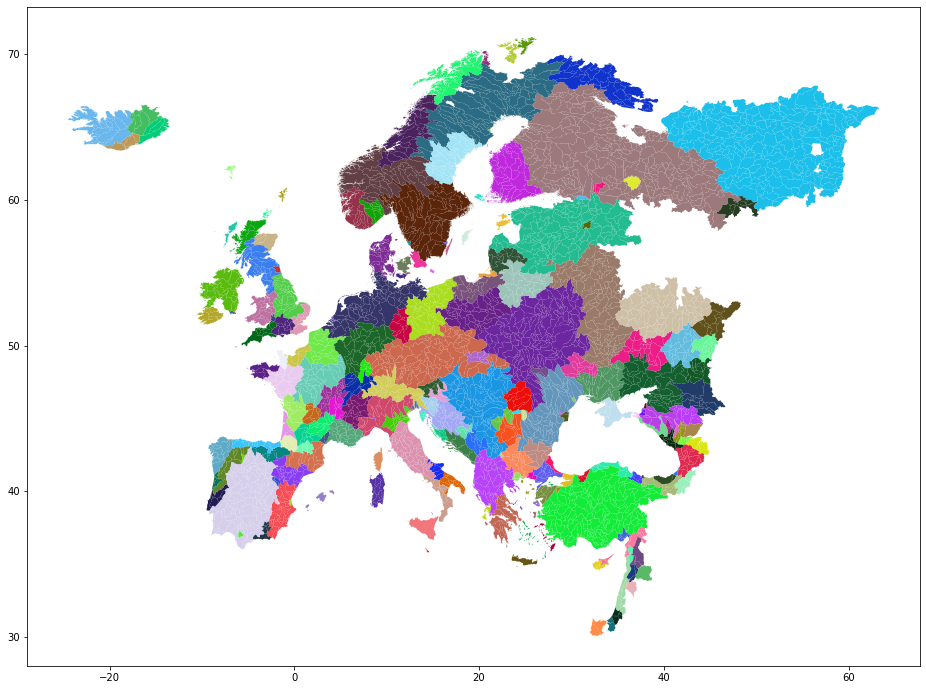

In [51]:
plot_clusters_shp(shp_noNA, clusters_corr08, figsize=(16,16))

In [52]:
clusters_corr085 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.85)

Computing neighbours strengths...


100%|██████████| 10558/10558 [00:01<00:00, 6786.00it/s]


Neighbours strengths computed.
Computing clusters...


4256it [07:41,  9.22it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 297
No. singletons = 104


  2%|▏         | 77/3855 [00:00<00:04, 764.33it/s]

100%|██████████| 3855/3855 [00:13<00:00, 292.38it/s]


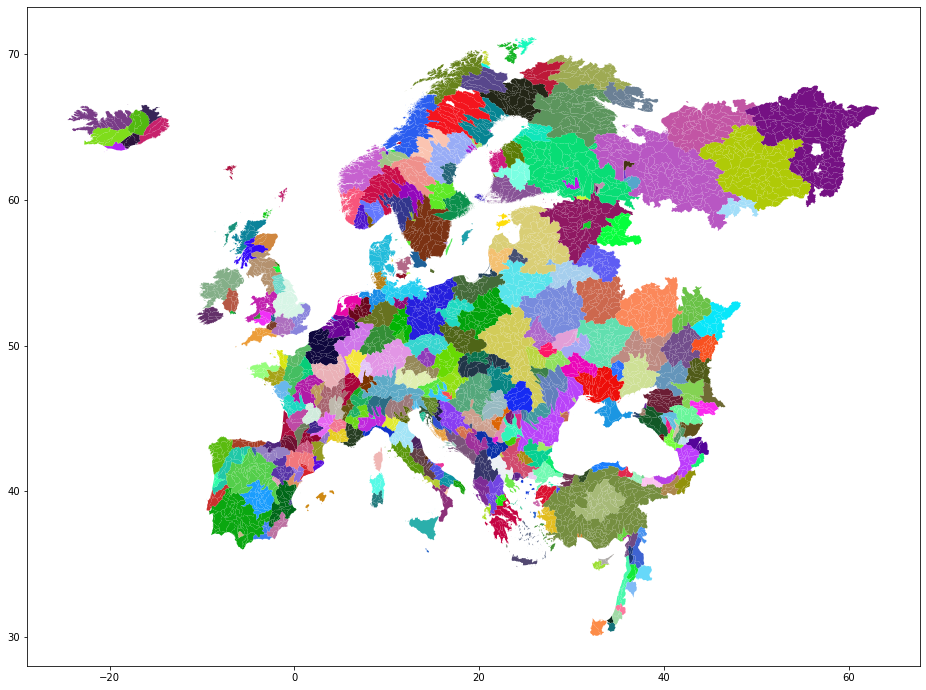

In [54]:
plot_clusters_shp(shp_noNA, clusters_corr085, figsize=(16,16))

In [55]:
clusters_corr09 = compute_clusters(df, neighbours, without_neighbours, method='correlation', threshold=0.9)

Computing neighbours strengths...


100%|██████████| 10558/10558 [00:02<00:00, 5042.59it/s]


Neighbours strengths computed.
Computing clusters...


4932it [08:39,  9.50it/s]                          

Clusters computed.


No. clusters (w/o singletons) = 549
No. singletons = 251


100%|██████████| 3855/3855 [00:09<00:00, 392.78it/s]


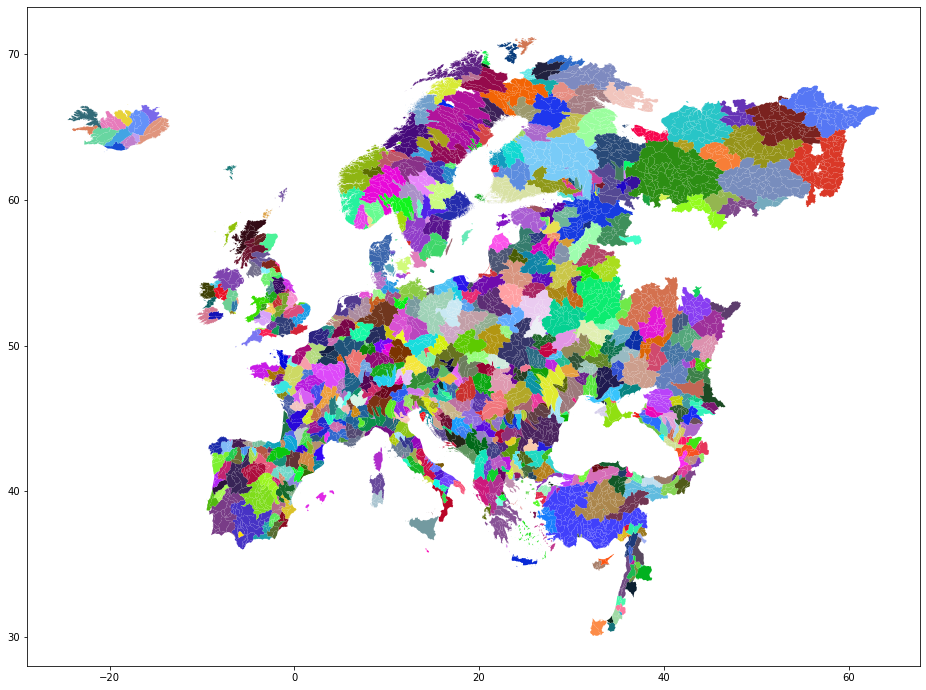

In [56]:
plot_clusters_shp(shp_noNA, clusters_corr09, figsize=(16,16))

In [36]:
clustering = HierarchicalClustering(df, neighbours, without_neighbours, method='complete_correlation', threshold=0.5)
clustering.compute_clusters()

Computing neighbours strengths...


100%|██████████| 10558/10558 [00:07<00:00, 1348.52it/s]


Neighbours strengths computed.
Computing clusters...


4066it [37:20,  1.81it/s]                          


Clusters computed.


No. clusters (w/o singletons) = 734
No. singletons = 88


100%|██████████| 3855/3855 [00:12<00:00, 298.19it/s]


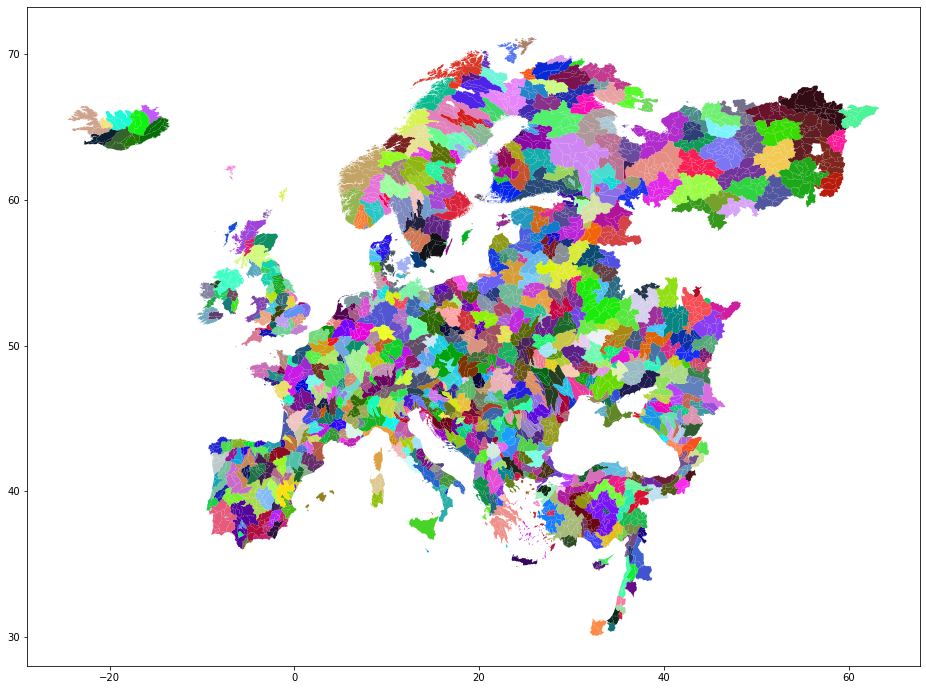

In [32]:
clusters = clustering.get_clusters_from_last_fathers(0.8)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

No. clusters (w/o singletons) = 961
No. singletons = 144


100%|██████████| 3855/3855 [00:09<00:00, 395.06it/s]


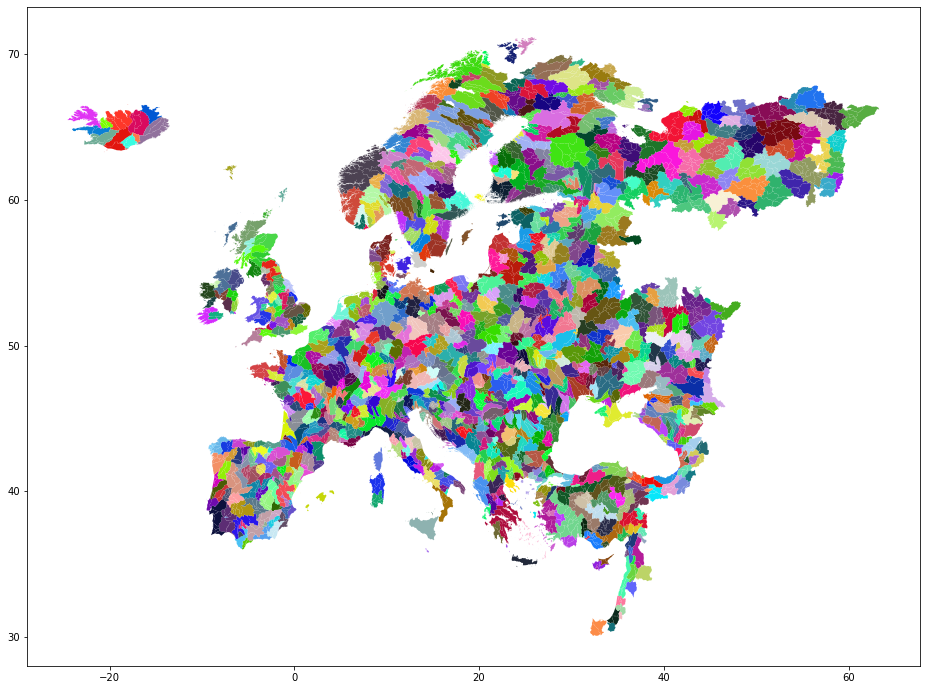

In [33]:
clusters = clustering.get_clusters_from_last_fathers(0.85)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

No. clusters (w/o singletons) = 1214
No. singletons = 355


100%|██████████| 3855/3855 [00:07<00:00, 529.66it/s] 


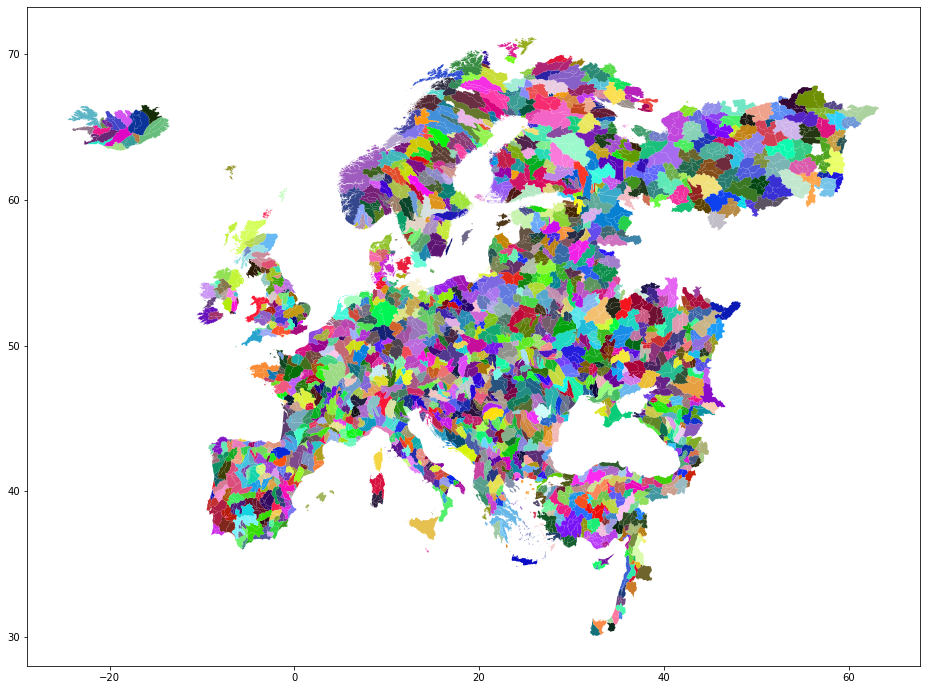

In [34]:
clusters = clustering.get_clusters_from_last_fathers(0.9)
plot_clusters_shp(shp_noNA, clusters, figsize=(16,16))

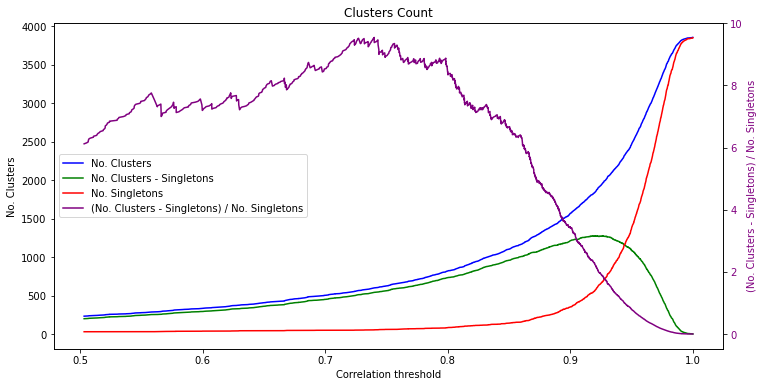

In [37]:
ordered_fathers, ordered_correlations, ordered_count, ordered_singletons = clustering.get_ordered_clusters()

# Create a single plot with two different y-axes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot the first set of data on the first y-axis
ax1.plot(ordered_correlations, ordered_count, label='No. Clusters', color='blue')
ax1.plot(ordered_correlations, np.subtract(np.array(ordered_count), np.array(ordered_singletons)), label='No. Clusters - Singletons', color='green')
ax1.plot(ordered_correlations, ordered_singletons, label='No. Singletons', color='red')
ax1.set_xlabel('Correlation threshold')
ax1.set_ylabel('No. Clusters')
ax1.tick_params(axis='y')

# Create a secondary y-axis on the same plot
ax2 = ax1.twinx()

# Plot the second set of data on the secondary y-axis
ax2.plot(ordered_correlations, np.subtract(np.array(ordered_count), np.array(ordered_singletons))/np.array(ordered_singletons), label='(No. Clusters - Singletons) / No. Singletons', color='purple')
ax2.set_ylabel('(No. Clusters - Singletons) / No. Singletons', color='purple')
ax2.tick_params(axis='y', labelcolor='purple')

# Combine the legends for both y-axes
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='center left')

# Set titles for the combined plot
plt.title('Clusters Count')

# Show the combined plot
plt.show()